<a href="https://colab.research.google.com/github/Pasuwat-Sirasareerot/Pasuwat_Sirasareerot/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score


In [14]:
df = pd.read_csv('/content/car data.csv')

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [65]:
df.shape

(301, 9)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [67]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [23]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [25]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-25-2d55ad1104b1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-25-2d55ad1104b1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [33]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [34]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [35]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [41]:
lin_reg_model = LinearRegression()

In [42]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [46]:
training_data_prediction = lin_reg_model.predict(X_train)

In [51]:
error_score = lin_reg_model.score(X_train, Y_train)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


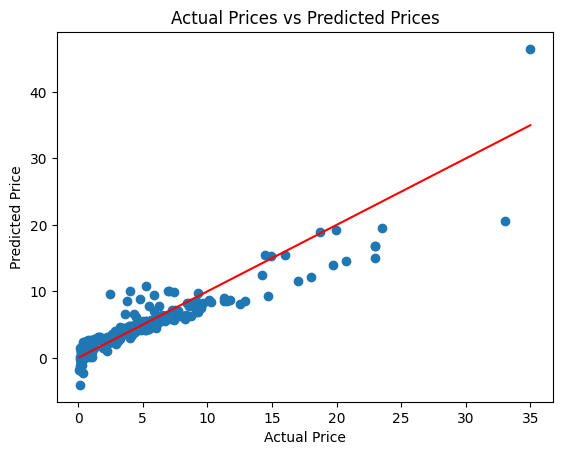

In [68]:
plt.scatter(Y_train, training_data_prediction)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red')  # เส้น y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [53]:
 test_data_prediction = lin_reg_model.predict(X_test)

In [54]:
error_score = lin_reg_model.score(X_test, Y_test)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


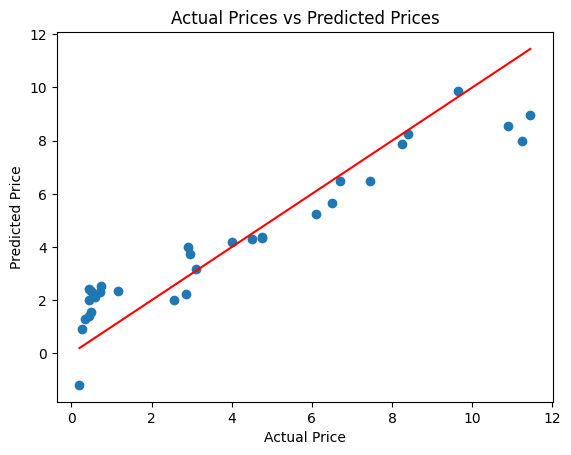

In [69]:
plt.scatter(Y_test, test_data_prediction)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')  # เส้น y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [56]:
lass_reg_model = Lasso()

In [57]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [58]:
training_data_prediction = lass_reg_model.predict(X_train)

In [59]:
error_score = lass_reg_model.score(X_train, Y_train)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


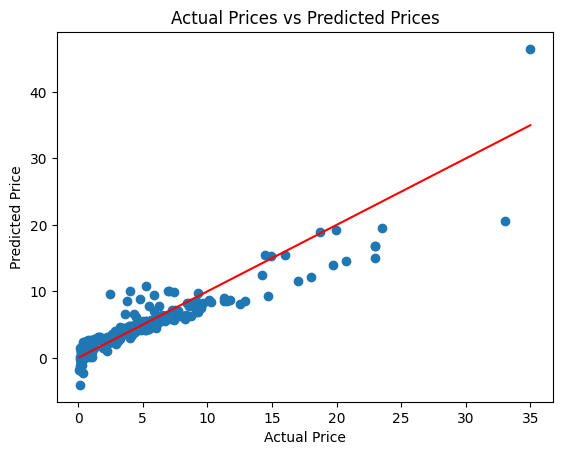

In [70]:
plt.scatter(Y_train, training_data_prediction)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red')  # เส้น y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [61]:
 test_data_prediction = lass_reg_model.predict(X_test)

In [62]:
error_score = lass_reg_model.score(X_test, Y_test)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


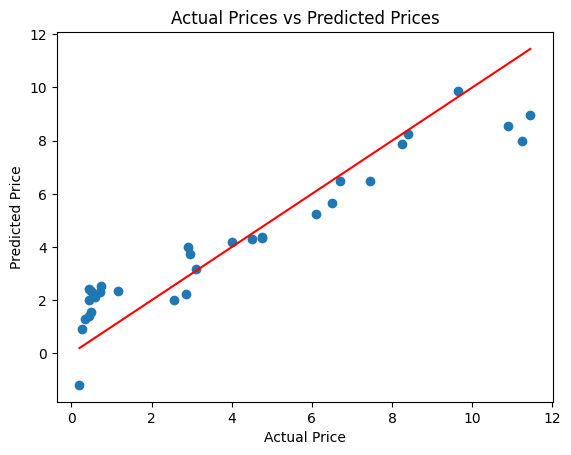

In [71]:
plt.scatter(Y_test, test_data_prediction)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')  # เส้น y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()